<a href="https://colab.research.google.com/github/MaTheusSlv/PosGraduacaoMackenzie_CienciaDeDados/blob/main/PL_Python_4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1>
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1>

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira*

<br>
<br>

---


# Exercícios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [ ]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [ ]:
nulos = WHO.isnull().sum() # guarda os atributos que contém valores ausentes

print('Quantidade de dados ausentes por atributo: ')
display(WHO.isnull().sum()) # mostra a quantidade de valores ausentes por atributo

print(f'\nO atributo que têm o maior percentual de dados ausentes é: {nulos.nlargest(1)}') #traz o atributo que mais têm valores ausentes

Quantidade de dados ausentes por atributo: 


Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64


O atributo que têm o maior percentual de dados ausentes é: Total expenditure    181
dtype: int64


# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais)

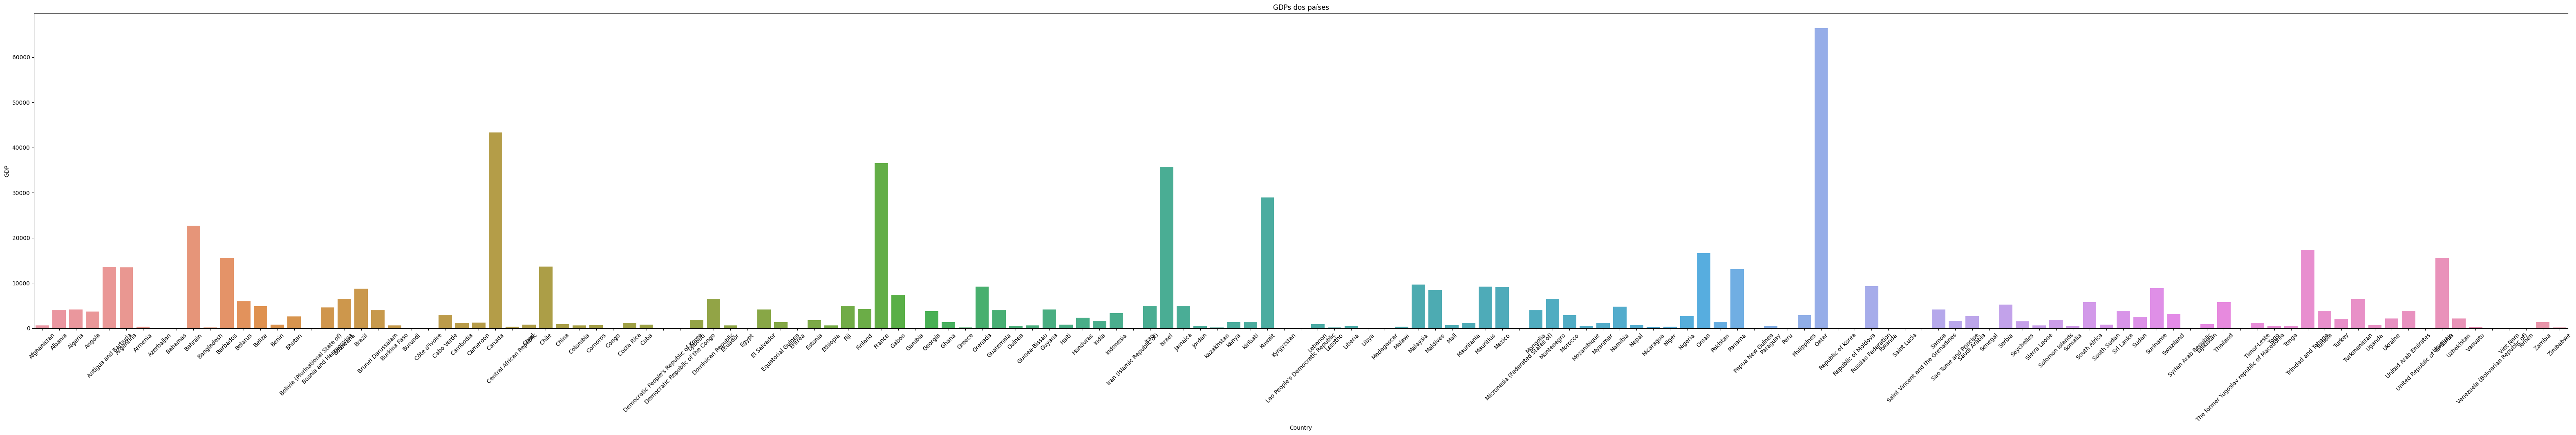

Canadá, França, Israel e Qatar são os países em desenvolvimento com o GDP mais discrepante dos demais


In [ ]:
fig, ax = plt.subplots(figsize=(80, 10)) # cria o gráfico
sns.barplot(x=WHO[WHO.Status == 'Developing'].Country, y=WHO.GDP) # traz as colunas dos paises em desenvolvimento e os seu valores de GDP
plt.xticks(rotation=45) # Vira em 45° as etiquetas do eixo X do gráfico
plt.ylim() # ajusta a altura do eixo Y de forma distribuída
plt.title('GDPs dos países') # titulo do gráfico

plt.show() # força a exibição da figura

print('Canadá, França, Israel e Qatar são os países em desenvolvimento com o GDP mais discrepante dos demais')

# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições?

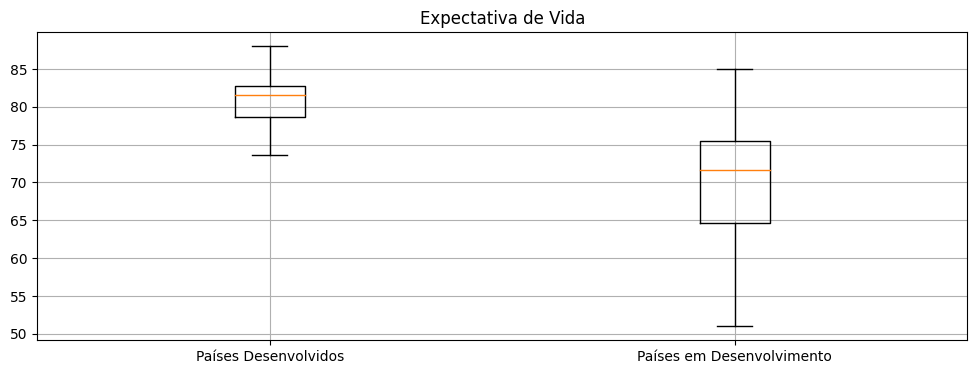

In [ ]:
plt.figure(figsize=(12,4)) # cria o gráfico
plt.boxplot(WHO[WHO.Status == 'Developed'].Life_expectancy, positions=[1]) # boxplot dos desenvolvidos
plt.boxplot(WHO[WHO.Status == 'Developing'].Life_expectancy, positions=[2]) # boxplot dos em desenvolvimento
plt.title('Expectativa de Vida') # título do gráfico
plt.xticks(ticks=[1,2], labels=['Países Desenvolvidos','Países em Desenvolvimento']) # rótulos dos boxplots
plt.grid() # grade do fundo

plt.show() # força a exibição da figura

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

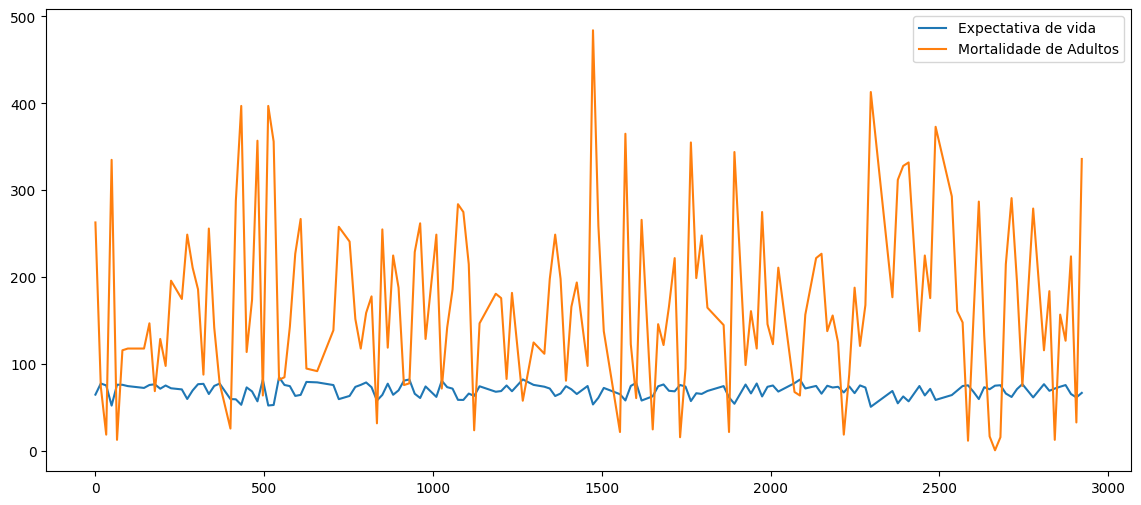

In [ ]:
fig, ax = plt.subplots(figsize=(14,6)) # cria o gráfico
ax.plot(WHO[WHO.Status == 'Developing']['Life_expectancy'], label='Expectativa de vida') # linha de expectativa de vida
ax.plot(WHO[WHO.Status == 'Developing']['Adult Mortality'], label='Mortalidade de Adultos') # linha de mortalidade de adultos
plt.ylim() # ajusta a altura do eixo Y de forma distribuída

plt.legend() # cria legenda

plt.show() # força a exibição da figura

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países?

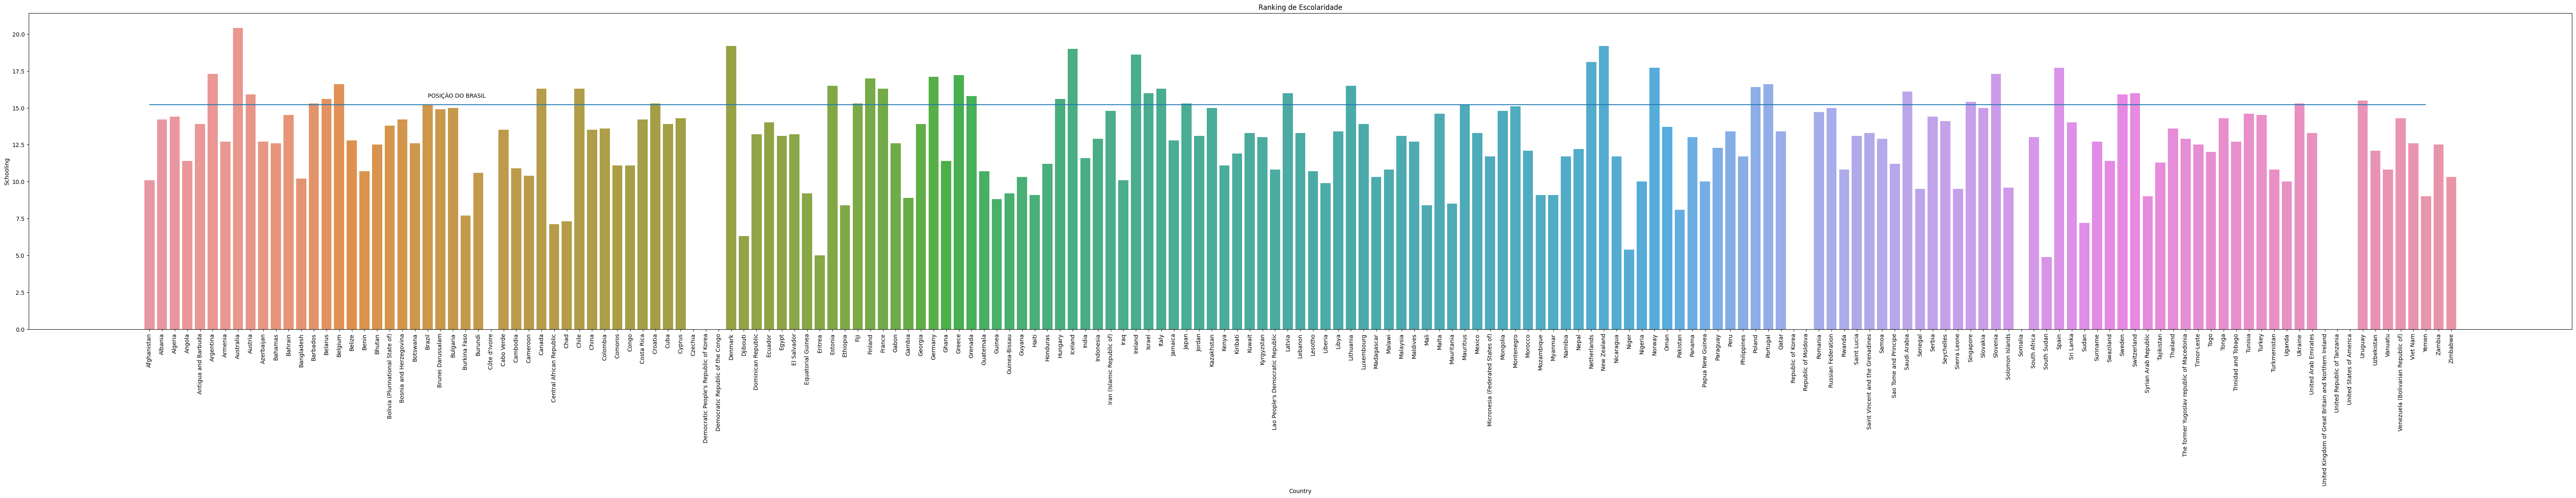

In [ ]:
plt.figure(figsize=(80,10)) #cria o gráfico
sns.barplot(x=WHO.Country, y=WHO.Schooling) # cria as colunas
plt.text(22, WHO[WHO.Country == 'Brazil'].Schooling+0.5, 'POSIÇÃO DO BRASIL') # escreve o texto
plt.hlines(WHO[WHO.Country == 'Brazil'].Schooling, 0, 180) # traça a linha na pontuação do Brasil
plt.title('Ranking de Escolaridade') # titulo do gráfico
plt.xticks(rotation=90) # Vira em 45° as etiquetas do eixo X do gráfico
plt.ylim() # ajusta a altura do eixo Y de forma distribuída

plt.show() # força a exibição da figura